In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/leasaab/Documents/Dev/AX3-Project/data/SmokerCardio.csv"

data = pd.read_csv(file_path)

data.columns = ['Temps', 'X', 'Y', 'Z']  # Ajoutez un nom pour chaque colonne présente

# Convertir la colonne 'Temps' en datetime si ce n'est pas déjà fait
data['Temps'] = pd.to_datetime(data['Temps'])

# Define axis labels for clarity
axis_labels = ['X', 'Y', 'Z']
colors = {'X': 'blue', 'Y': 'red', 'Z': 'green'}  # Define colors for each signal

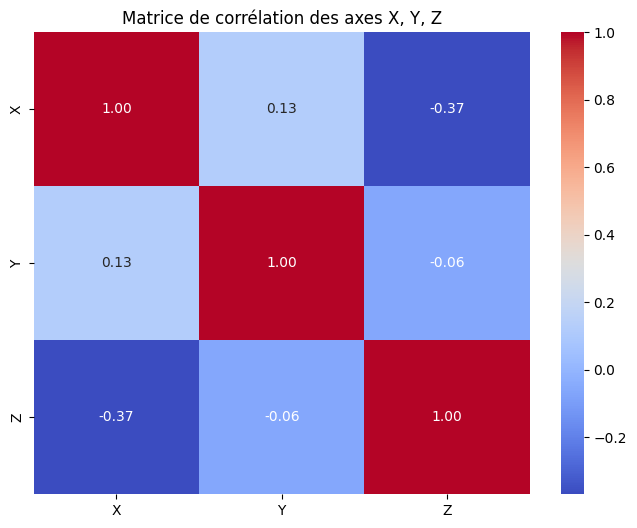

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation entre les axes
data.columns = ['Temps', 'X', 'Y', 'Z']
correlations = data[['X', 'Y', 'Z']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Matrice de corrélation des axes X, Y, Z")
plt.show()

Dans la matrice de corrélation : l’axe Z a des corrélations faibles avec X et Y (-0.37 et -0.06 respectivement), ce qui est cohérent avec un axe dominant des mouvements verticaux indépendants. Les axes X et Y sont faiblement liés, ce qui suggère qu’ils mesurent des directions secondaires ou moins pertinentes dans cette activité.

Métriques des données filtrées (2000 à 4000 secondes) :

     Nombre de pics  Amplitude moyenne
Axe                                   
X           45042.0          15.984375
Y           50591.0          10.812500
Z           76945.0          12.125000

Matrice de corrélation entre les axes X, Y et Z :

          X         Y         Z
X  1.000000  0.092148 -0.441950
Y  0.092148  1.000000 -0.268978
Z -0.441950 -0.268978  1.000000


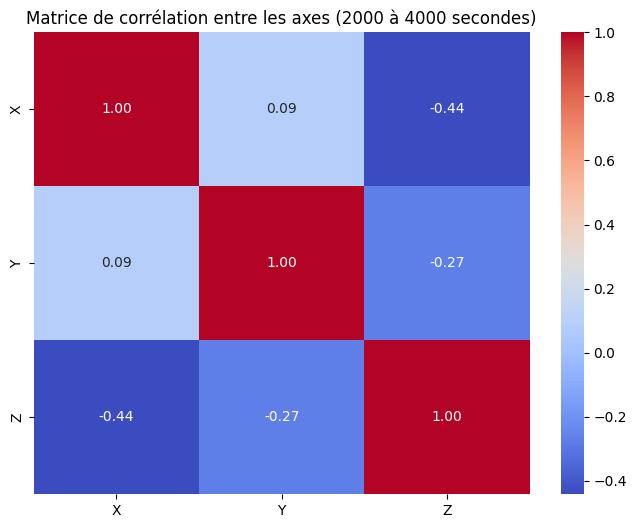

In [9]:
import pandas as pd
import numpy as np

sampling_interval = (
        data['Temps'].iloc[1] - data['Temps'].iloc[0]
    ).total_seconds()

data['Temps'] = data.index * sampling_interval
filtered_data = data[(data['Temps'] >= 2000) & (data['Temps'] <= 4000)]

# Fonction pour calculer des métriques de base
def calculate_metrics(signal):
    """
    Calcule les métriques pour un signal donné :
    - Nombre de pics (approximation avec une méthode simplifiée).
    - Amplitude moyenne (écart entre le max et le min).

    Parameters:
        signal (pandas.Series): Signal pour lequel les métriques seront calculées.

    Returns:
        dict: Dictionnaire avec le nombre de pics et l'amplitude moyenne.
    """
    # Nombre de pics (approximation basée sur la dérivée)
    peaks = ((signal.values[1:-1] > signal.values[:-2]) & 
             (signal.values[1:-1] > signal.values[2:]))
    num_peaks = np.sum(peaks)
    
    # Amplitude moyenne
    mean_amplitude = signal.max() - signal.min()
    
    return {'Nombre de pics': num_peaks, 'Amplitude moyenne': mean_amplitude}

# Calcul des métriques pour chaque axe
metrics = {}
for axis in ['X', 'Y', 'Z']:
    metrics[axis] = calculate_metrics(filtered_data[axis])

# Afficher les métriques sous forme de DataFrame pour plus de lisibilité
metrics_df = pd.DataFrame(metrics).T
metrics_df.index.name = 'Axe'
print("Métriques des données filtrées (2000 à 4000 secondes) :\n")
print(metrics_df)

# Calculer les corrélations entre les axes X, Y et Z
correlations = filtered_data[['X', 'Y', 'Z']].corr()

# Afficher la matrice de corrélation
print("\nMatrice de corrélation entre les axes X, Y et Z :\n")
print(correlations)

# Visualiser la matrice de corrélation avec un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Matrice de corrélation entre les axes (2000 à 4000 secondes)")
plt.show()
